# Data Analysis
--------------------
Question 1: Is there a relationship between exposure to poor air quality and incidences of cancer?

Question 2: Does your probability of developing a certain type of cancer change depending on your geographic location in the US?

Question 3: How well can you predict (cancer instances/risk/rate) from AQI and year?

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from config import state_abbrev, reverse_state_abbrev, state_codes, us_state_abbrev

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import statsmodels as sm
import sklearn as sk
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.formula.api as smf
from scipy import stats

from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def make_scatterplot(df, group_by=[], x='', y='', xlabel='', ylabel='', main_title='', legend_title='', linestyle='', return_obj=False):
    '''Function to make a scatterplot out of desired data'''
    fig, ax = plt.subplots()
    ax.margins(0.05)
    
    groups = df.groupby(group_by)
    
    # Scatterplot with cancer sites as categories 
    for name, group in groups:
        if len(group_by) > 1: 
            lbl=name #[-1]
        else: lbl=name
#         print(name)
        ax.plot(group[x], group[y], animated=True,
                marker='o', ms=3, linestyle=linestyle, label=lbl)
    
    if xlabel == '': xlabel = x
    if ylabel == '': ylabel = y
    if main_title == '': main_title = '{y} vs {x}'.format(y=y, x=x)
    
    # Set plot attributes
    plt.xlim(min(df[x]), max(df[x]))
    plt.ylim(min(df[y]), max(df[y]))
    fig.suptitle(main_title)
    ax.legend(bbox_to_anchor=(1.55, 1), title=legend_title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.grid(alpha=0.5)
    
    if return_obj == True:
        return plt
    
    plt.show()

In [3]:
def generate_county_choropleth(df, values='', fips='', title='', data=''):
    value_key = values
    values = df['{}'.format(values)].tolist()
    fips = df['{}'.format(fips)].tolist()
    
    if data == 'aqi':
        colors = {"good": "#1fca23", "moderate": "#fffd38", "usg":"#fc6621",  
                        "unhealthy": "#fc0d1b", "very unhealthy":"#97084c", 
                        "hazardous":"#7d0425", "off scale":"#000000"}
        colorscale=colors.values()
        endpts = [50, 100, 150, 200, 300, 500]
        
    elif data == 'population':
        colorscale = ['rgb(193, 193, 193)',
                      'rgb(239,239,239)',
                      'rgb(195, 196, 222)',
                      'rgb(144,148,194)',
                      'rgb(101,104,168)',
                      'rgb(65, 53, 132)']
        endpts=[14348, 63983, 134827, 426762, 2081313]
        
    elif data == 'cancer':
        colorscale = ["#ebf3fb","#deebf7","#d2e3f3","#c6dbef",
                      "#b3d2e9","#9ecae1","#85bcdb","#6baed6","#57a0ce"]
        endpts = list(np.mgrid[0:max(values):5j])
        
    else:
        colorscale = colorscale = ["#ff0000","#ff9900","#ffff00",
                                   "#ccff33","#33cc33", "#bfbfbf"]
        endpts = endpts = list(np.mgrid[0:max(values):5j])
        
    fig = ff.create_choropleth(
        fips = fips, values = values,
        scope=['usa'],
        binning_endpoints = endpts,
        colorscale= colorscale,
        show_state_data=True,
        county_outline={'color': 'rgb(0,0,0)', 'width': 0.5},
        show_hover=True, centroid_marker={'opacity': 0},
        asp=2.9,
        title=title,
        legend_title=value_key)
    py.iplot(fig, filename='choropleth_full_usa')

In [4]:
# Read in data
aqi = pd.read_csv("clean_data/aqi_1980_2018.csv", index_col=0)        # AQI data by state/county: 1980-2018
cancer = pd.read_csv("clean_data/cancer_1998_2014.csv", index_col=0)  # Cancer data by state: 1998-2014
print("AQI Data Headers:\n", aqi.keys().tolist())
print("\nCancer Data Headers:\n", cancer.keys().tolist())

AQI Data Headers:
 ['State', 'County', 'State Abbreviation', 'Year', 'FIPS', 'State FIPS Code', 'County FIPS Code', 'Max AQI', '90th Percentile AQI', '% Days AQI Unhealthy-Hazardous', '% Days CO', '% Days NO2', '% Days SO2', '% Days Ozone', '% Days PM2.5', '% Days PM10']

Cancer Data Headers:
 ['State', 'State Abbreviation', 'Year', 'Cancer Sites', 'Count']


In [5]:
aqi.head()

,State,County,State Abbreviation,Year,FIPS,State FIPS Code,County FIPS Code,Max AQI,90th Percentile AQI,% Days AQI Unhealthy-Hazardous,% Days CO,% Days NO2,% Days SO2,% Days Ozone,% Days PM2.5,% Days PM10
0,alabama,autauga,AL,1980,1001,1,1,177,108,2.234637,0.0,0.0,31.843575,68.156425,0.0,0.0
1,alabama,autauga,AL,1981,1001,1,1,195,77,1.120448,0.0,0.0,32.492997,67.507003,0.0,0.0
2,alabama,autauga,AL,1982,1001,1,1,206,67,0.408163,0.0,0.0,32.244898,67.755102,0.0,0.0
3,alabama,autauga,AL,1989,1001,1,1,100,64,0.000000,0.0,0.0,0.000000,100.000000,0.0,0.0
4,alabama,autauga,AL,1990,1001,1,1,151,93,0.375940,0.0,0.0,0.000000,100.000000,0.0,0.0


## How has air quality changed since 1980?

In [ ]:
# The map displays a functioning slider and index, however the values/color gradient for the individual states is not displaying.  

# url = 'https://raw.githubusercontent.com/alyssflynn/project-1/master/clean_data/county_aqi_1980_2018.csv'
# dataset = pd.read_csv(url)
# years = sorted(list(set(dataset.Year)))

# data = []

# for year in years:
#     df = dataset[dataset.Year ==year].copy(deep=True)
#     this_dict = dict(type='choropleth',
#              locations = df['State Abbreviation'].astype(str),
#              z=df['Median AQI'].astype(float), # for whatever reason the values of "Max AQI" are not displaying in the map.
#              locationmode="USA-states")
#     data.append(this_dict)
# # let's create the steps for the slider
# steps = []
# for i in range(len(data)):
#     step = dict(method='restyle',
#                 args=['visible', [False] * len(data)],
#                 label='Year {}'.format(i + 1980))
#     step['args'][1][i] = True
#     steps.append(step)

# sliders = [dict(active=0,
#                 pad={"t": 1},
#                 steps=steps)]    
# layout = dict(geo=dict(scope='usa',
#                        projection={'type': 'Mercator'}),
#               sliders=sliders)

# fig = dict(data=data, 
#            layout=layout)
# py.iplot(fig, validate=False)


This choropleth displays a map of the average median AQI by each state for the period of 1980-2018. The purpose of the choropleth is to 
show a trend of increasing median AQI for an increasing number of states over the years. 

/Users/alyss/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



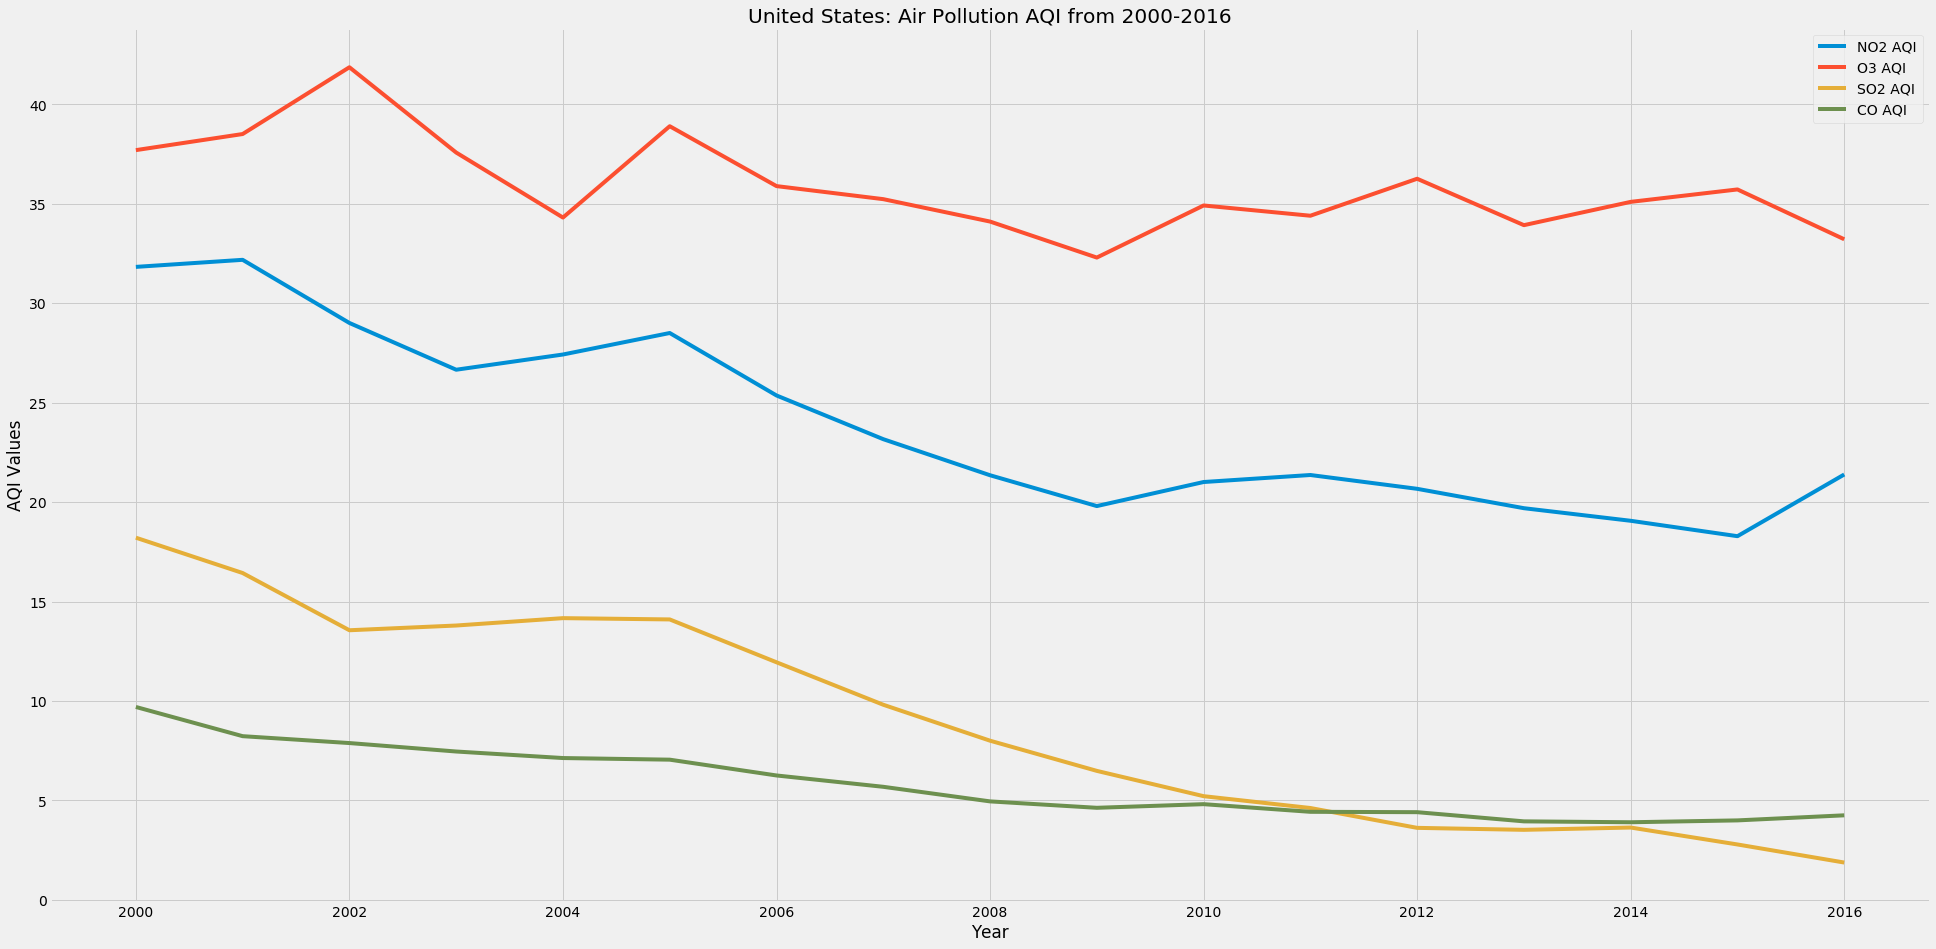

In [16]:
pollution_data = pd.read_csv("../pollution_us_2000_2016.csv")
pollution_data.drop(['Unnamed: 0','Site Num','Address',
                    'NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
pollution_data_c = pollution_data[['State','County','State Code','County Code','City',
                                  'Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollution_data_c = pollution_data_c.dropna(axis='rows')
pollution_data_c = pollution_data_c[pollution_data_c.State!='Country Of Mexico']
pollution_data_c['Date Local'] = pd.to_datetime(pollution_data_c['Date Local'],format='%Y-%m-%d')
pollution_data_c['Date Local'] = pollution_data_c['Date Local'].apply(str)
pollution_data_c['State Code'] = pollution_data_c['State Code'].apply(str)
pollution_data_c['County Code'] = pollution_data_c['County Code'].apply(str)
pollution_data_c['Year'] = pollution_data_c['Date Local'].apply(lambda x: x.split("-")[0])
pollution_data_c['Month'] = pollution_data_c['Date Local'].apply(lambda x: x.split("-")[1])
pollution_data_c['Day'] = pollution_data_c['Date Local'].apply(lambda x: x.split("-")[2])
pollution_data_c = pollution_data_c.rename(columns = {"State Code": "State Code (FIPS)"})
pollution_data_c['State Code (FIPS)'] = pollution_data_c['State Code (FIPS)'].apply(lambda x: str(x).zfill(2))
pollution_data_c['County Code'] = pollution_data_c['County Code'].apply(lambda x: str(x).zfill(3))
pollution_data_c['FIPS'] = pollution_data_c['State Code (FIPS)'] + pollution_data_c['County Code']
pollution_data_c['Year'] = pollution_data_c['Year'].apply(int)

pollution_data_c = pollution_data_c.groupby(['Year','State'], as_index=False).mean()

plt.style.use('fivethirtyeight')

pollution_data_c = pollution_data_c.groupby(['Year'])[['Year', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']].mean()
pollution_data_c.plot(kind='line', x='Year', y=['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI'], figsize=(30, 15))
plt.title("United States: Air Pollution AQI from 2000-2016")
plt.ylabel("AQI Values")
plt.show()

This line chart shows the median and Max AQI averages for the period of 1980-2018. Both averages have been decreasing since 1980, more 
specifically though, Max AQI started ~ 180 at year 1980 and decreased to 139 by year 1992 and spiked to 162 by year 2002 and then has since 
decreased to 120 by year 2018. Median AQI has remained relatively stable, however has decreased since 1980 to 2018. 

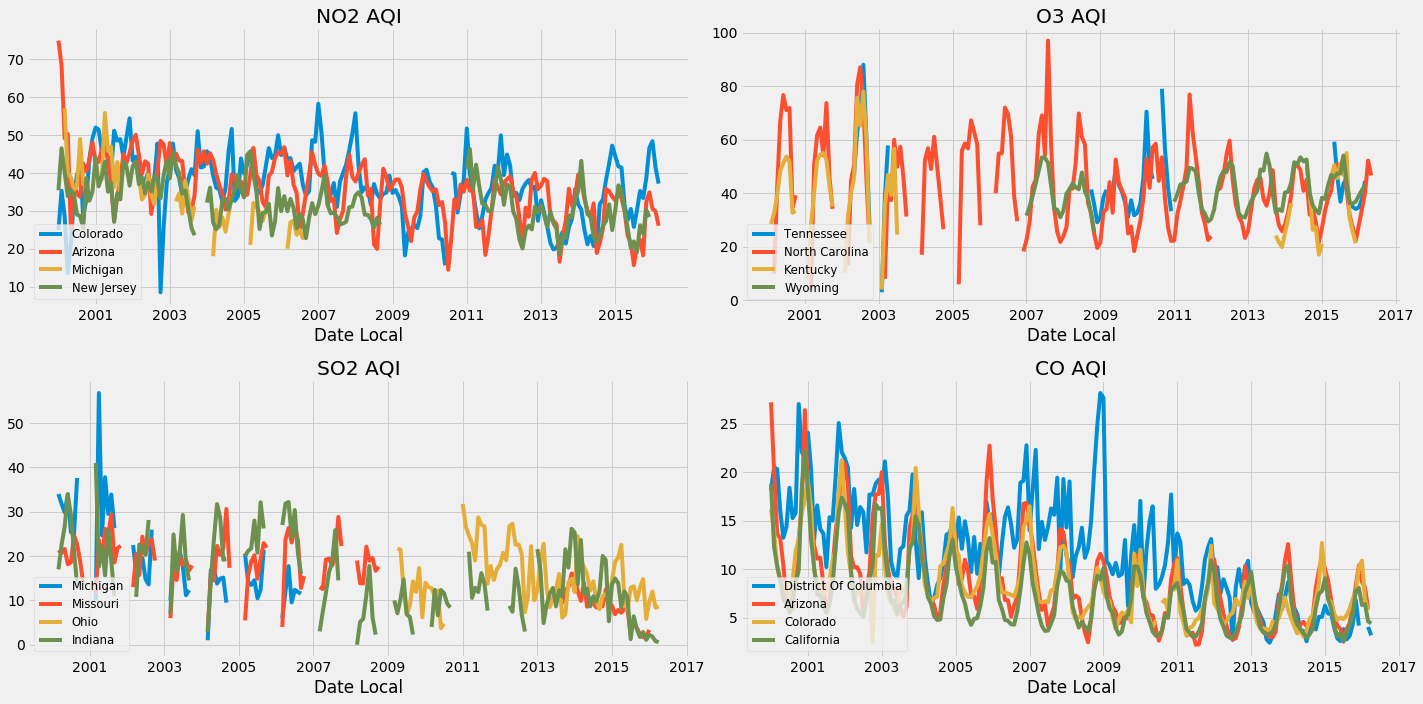

In [18]:
poll = pd.read_csv("../pollution_us_2000_2016.csv")

poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)


## Prepare all 4 AQIs against state and date 
pollSt = poll[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt = pollSt.dropna(axis='rows')  # Delete rows with NAs
pollSt = pollSt[pollSt.State!='Country Of Mexico']  # Delete Mexico
pollSt['Date Local'] = pd.to_datetime(pollSt['Date Local'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date Local']).mean()  # Take mean values if there are depulicated entries
pollStGrouped = pollSt.groupby(level=0)

## Plot 4 AQIs with top 4 states
plt.figure(figsize=(20,10))

# NO2 AQI
plt.subplot(221)
pollNO2 = pollStGrouped['NO2 AQI']
pollNO2Top = pollNO2.mean().nlargest(4).index
for i in range(len(pollNO2Top)):
    pollNO2.get_group(pollNO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollNO2Top,loc=3,fontsize='small')
plt.title('NO2 AQI')

# O3 AQI
plt.subplot(222)
pollO3 = pollStGrouped['O3 AQI']
pollO3Top = pollO3.mean().nlargest(4).index
for i in range(len(pollO3Top)):
    pollO3.get_group(pollO3Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollO3Top,loc=3,fontsize='small')
plt.title('O3 AQI')

# SO2 AQI
plt.subplot(223)
pollSO2 = pollStGrouped['SO2 AQI']
pollSO2Top = pollSO2.mean().nlargest(4).index
for i in range(len(pollSO2Top)):
    pollSO2.get_group(pollSO2Top[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollSO2Top,loc=3,fontsize='small')
plt.title('SO2 AQI')

# CO AQI
plt.subplot(224)
pollCO = pollStGrouped['CO AQI']
pollCOTop = pollCO.mean().nlargest(4).index
for i in range(len(pollCOTop)):
    pollCO.get_group(pollCOTop[i]).groupby(pd.Grouper(level='Date Local',freq='M')).mean().plot()
plt.legend(pollCOTop,loc=3,fontsize='small')
plt.title('CO AQI')

plt.tight_layout()
plt.show()

In [20]:
poll = pollution_data
poll = poll.drop(['Unnamed: 0','State Code','County Code','Site Num','Address','NO2 Units','O3 Units','SO2 Units','CO Units'],axis=1)
poll.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,1.145833,4.2,21,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,13.0,0.878947,2.2,23,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,1.145833,4.2,21,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,NaN,0.878947,2.2,23,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,4.0,0.850000,1.6,23,NaN


In [24]:
# pollStO3 = pollStO3.reset_index()
# pollStO3 = pollStO3[pollStO3['State']!='District Of Columbia']
# pollStO3['State_abbrev'] = pollStO3.State.apply(lambda x: us_state_abbrev[x])

In [25]:
## Create 'dynamic' colorscale - it seems plotly doesn't provide fixed colorscale, so we should keep the colorcode fixed with some calculation...
def scale(aqiSeries):
    cmax = aqiSeries.max()
    cmin = aqiSeries.min()
    dt = 1e-5
    cg = min((50-cmin)/(cmax-cmin)+dt,1.0)
    cy = min((100-cmin)/(cmax-cmin)+dt,1.0)
    co = min((150-cmin)/(cmax-cmin)+dt,1.0)
    cr = min((200-cmin)/(cmax-cmin)+dt,1.0)
    cp = min((300-cmin)/(cmax-cmin)+dt,1.0)
    cm = min((500-cmin)/(cmax-cmin)+dt,1.0)

    colorcode = [cg,cy,co,cr,cp,cm]
    colors = ['green','yellow','orange','red','purple','maroon']
    scl = []
    prev = 0
    for i in range(len(colorcode)):
        scl.extend([[prev,colors[i]],[colorcode[i],colors[i]]])
        prev=colorcode[i]
        if colorcode[i]==1.0: break
    
    return scl
## Create MaxAQI and MAXAQIValue that dipict the worst AQI and its value of the month
pMonth = []
months = ['2015-01-31','2015-02-28','2015-03-31','2015-04-30','2015-05-31','2015-06-30',
        '2015-07-31','2015-08-31','2015-09-30','2015-10-31','2015-11-30','2015-12-31']

pollStMonth = pollSt.reset_index(level=0).groupby(['State']).resample('M').max().drop(['State'],axis=1)
pollStMonth = pollStMonth.reset_index()

for i,month in enumerate(months):
    p = pollStMonth[pollStMonth['Date Local']==month].copy()
    p['MaxAQIValue'] = p.max(axis=1)
    p['MaxAQI'] = p.drop(['State','Date Local'],axis=1).idxmax(axis=1)

    p = p[p['State']!='District Of Columbia']
    p['State_abbrev'] = p.State.apply(lambda x: us_state_abbrev[x])
    pMonth.append(p[p['MaxAQI'].notnull()])

data=[]
layout = dict(
        title = 'Monthly Max AQI in 2015',
        width = 1000,
        height = 600
)

for i in range(12):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    data.append(dict(
        type='choropleth',
        locationmode = 'USA-states',
        z = pMonth[i]['MaxAQIValue'],
        colorscale = scale(pMonth[i]['MaxAQIValue']),
        autocolorscale = False,
        locations = pMonth[i].State_abbrev,
        text = pMonth[i]['MaxAQI'].apply(lambda x:x[:-3]),
        showscale =False,
        geo=geo_key,
        marker = dict(line = dict(color='rgb(227,227,227)',width = 1.5)),
        ))
    
    data.append(dict(
        type = 'scattergeo',
        showlegend = False,
        lon = [-80],
        lat = [48],
        geo = geo_key,
        text = months[i][:-3],
        mode = 'text',
        ))
    layout[geo_key] = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            domain = dict( x = [], y = [] ),
            lakecolor = 'rgb(255, 255, 255)')
z = 0
COLS = 4
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1

figure = dict(data = data, layout = layout)
py.iplot(figure)

########################## 2015 ##########################

In [27]:
########################## 2014 ##########################
## Create MaxAQI and MAXAQIValue that dipict the worst AQI and its value of the month
pMonth = []

months = ['2014-01-31','2014-02-28','2014-03-31','2014-04-30',
            '2014-05-31','2014-06-30','2014-07-31','2014-08-31',
            '2014-09-30','2014-10-31','2014-11-30','2014-12-31']


pollStMonth = pollSt.reset_index(level=0).groupby(['State']).resample('M').max().drop(['State'],axis=1)
pollStMonth = pollStMonth.reset_index()

for i,month in enumerate(months):
    p = pollStMonth[pollStMonth['Date Local']==month].copy()
    p['MaxAQIValue'] = p.max(axis=1)
    p['MaxAQI'] = p.drop(['State','Date Local'],axis=1).idxmax(axis=1)

    p = p[p['State']!='District Of Columbia']
    p['State_abbrev'] = p.State.apply(lambda x: us_state_abbrev[x])
    pMonth.append(p[p['MaxAQI'].notnull()])

data=[]
layout = dict(
        title = 'Monthly Max AQI in 2014',
        width = 1000,
        height = 600
)

for i in range(12):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    data.append(dict(
        type='choropleth',
        locationmode = 'USA-states',
        z = pMonth[i]['MaxAQIValue'],
        colorscale = scale(pMonth[i]['MaxAQIValue']),
        autocolorscale = False,
        locations = pMonth[i].State_abbrev,
        text = pMonth[i]['MaxAQI'].apply(lambda x:x[:-3]),
        showscale =False,
        geo=geo_key,
        marker = dict(line = dict(color='rgb(227,227,227)',width = 1.5)),
        ))
    
    data.append(dict(
        type = 'scattergeo',
        showlegend = False,
        lon = [-80],
        lat = [48],
        geo = geo_key,
        text = months[i][:-3],
        mode = 'text',
        ))
    layout[geo_key] = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            domain = dict( x = [], y = [] ),
            lakecolor = 'rgb(255, 255, 255)')
z = 0
COLS = 4
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1

figure = dict(data = data, layout = layout)
py.iplot(figure)

In [29]:
########################## 2013 ##########################
## Create MaxAQI and MAXAQIValue that dipict the worst AQI and its value of the month
pMonth = []
# months = ['2015-01-31','2015-02-28','2015-03-31','2015-04-30','2015-05-31','2015-06-30',
#         '2015-07-31','2015-08-31','2015-09-30','2015-10-31','2015-11-30','2015-12-31']


months = ['2013-01-31','2013-02-28','2013-03-31','2013-04-30',
            '2013-05-31','2013-06-30','2013-07-31','2013-08-31',
            '2013-09-30','2013-10-31','2013-11-30','2013-12-31']


pollStMonth = pollSt.reset_index(level=0).groupby(['State']).resample('M').max().drop(['State'],axis=1)
pollStMonth = pollStMonth.reset_index()

for i,month in enumerate(months):
    p = pollStMonth[pollStMonth['Date Local']==month].copy()
    p['MaxAQIValue'] = p.max(axis=1)
    p['MaxAQI'] = p.drop(['State','Date Local'],axis=1).idxmax(axis=1)

    p = p[p['State']!='District Of Columbia']
    p['State_abbrev'] = p.State.apply(lambda x: us_state_abbrev[x])
    pMonth.append(p[p['MaxAQI'].notnull()])
    
data=[]
layout = dict(
        title = 'Monthly Max AQI in 2013',
        width = 1000,
        height = 600
)

for i in range(12):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    data.append(dict(
        type='choropleth',
        locationmode = 'USA-states',
        z = pMonth[i]['MaxAQIValue'],
        colorscale = scale(pMonth[i]['MaxAQIValue']),
        autocolorscale = False,
        locations = pMonth[i].State_abbrev,
        text = pMonth[i]['MaxAQI'].apply(lambda x:x[:-3]),
        showscale =False,
        geo=geo_key,
        marker = dict(line = dict(color='rgb(227,227,227)',width = 1.5)),
        ))
    
    data.append(dict(
        type = 'scattergeo',
        showlegend = False,
        lon = [-80],
        lat = [48],
        geo = geo_key,
        text = months[i][:-3],
        mode = 'text',
        ))
    layout[geo_key] = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            domain = dict( x = [], y = [] ),
            lakecolor = 'rgb(255, 255, 255)')
z = 0
COLS = 4
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1

figure = dict(data = data, layout = layout)
py.iplot(figure)

In [30]:
########################## 2012 ##########################
## Create MaxAQI and MAXAQIValue that dipict the worst AQI and its value of the month
pMonth = []
months = ['2012-01-31','2012-02-28','2012-03-31','2012-04-30',
            '2012-05-31','2012-06-30','2012-07-31','2012-08-31',
            '2012-09-30','2012-10-31','2012-11-30','2012-12-31']


pollStMonth = pollSt.reset_index(level=0).groupby(['State']).resample('M').max().drop(['State'],axis=1)
pollStMonth = pollStMonth.reset_index()

for i,month in enumerate(months):
    p = pollStMonth[pollStMonth['Date Local']==month].copy()
    p['MaxAQIValue'] = p.max(axis=1)
    p['MaxAQI'] = p.drop(['State','Date Local'],axis=1).idxmax(axis=1)

    p = p[p['State']!='District Of Columbia']
    p['State_abbrev'] = p.State.apply(lambda x: us_state_abbrev[x])
    pMonth.append(p[p['MaxAQI'].notnull()])
    
data=[]
layout = dict(
        title = 'Monthly Max AQI in 2012',
        width = 1000,
        height = 600
)

for i in range(12):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    data.append(dict(
        type='choropleth',
        locationmode = 'USA-states',
        z = pMonth[i]['MaxAQIValue'],
        colorscale = scale(pMonth[i]['MaxAQIValue']),
        autocolorscale = False,
        locations = pMonth[i].State_abbrev,
        text = pMonth[i]['MaxAQI'].apply(lambda x:x[:-3]),
        showscale =False,
        geo=geo_key,
        marker = dict(line = dict(color='rgb(227,227,227)',width = 1.5)),
        ))
    
    data.append(dict(
        type = 'scattergeo',
        showlegend = False,
        lon = [-80],
        lat = [48],
        geo = geo_key,
        text = months[i][:-3],
        mode = 'text',
        ))
    layout[geo_key] = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            domain = dict( x = [], y = [] ),
            lakecolor = 'rgb(255, 255, 255)')
z = 0
COLS = 4
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1

figure = dict(data = data, layout = layout)
py.iplot(figure)

In [31]:
########################## 2011 ##########################
## Create MaxAQI and MAXAQIValue that dipict the worst AQI and its value of the month
pMonth = []
months = ['2011-01-31','2011-02-28','2011-03-31','2011-04-30',
            '2011-05-31','2011-06-30','2011-07-31','2011-08-31',
            '2011-09-30','2011-10-31','2011-11-30','2011-12-31']


pollStMonth = pollSt.reset_index(level=0).groupby(['State']).resample('M').max().drop(['State'],axis=1)
pollStMonth = pollStMonth.reset_index()

for i,month in enumerate(months):
    p = pollStMonth[pollStMonth['Date Local']==month].copy()
    p['MaxAQIValue'] = p.max(axis=1)
    p['MaxAQI'] = p.drop(['State','Date Local'],axis=1).idxmax(axis=1)

    p = p[p['State']!='District Of Columbia']
    p['State_abbrev'] = p.State.apply(lambda x: us_state_abbrev[x])
    pMonth.append(p[p['MaxAQI'].notnull()])
    
data=[]
layout = dict(
        title = 'Monthly Max AQI in 2011',
        width = 1000,
        height = 600
)

for i in range(12):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    data.append(dict(
        type='choropleth',
        locationmode = 'USA-states',
        z = pMonth[i]['MaxAQIValue'],
        colorscale = scale(pMonth[i]['MaxAQIValue']),
        autocolorscale = False,
        locations = pMonth[i].State_abbrev,
        text = pMonth[i]['MaxAQI'].apply(lambda x:x[:-3]),
        showscale =False,
        geo=geo_key,
        marker = dict(line = dict(color='rgb(227,227,227)',width = 1.5)),
        ))
    
    data.append(dict(
        type = 'scattergeo',
        showlegend = False,
        lon = [-80],
        lat = [48],
        geo = geo_key,
        text = months[i][:-3],
        mode = 'text',
        ))
    layout[geo_key] = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            domain = dict( x = [], y = [] ),
            lakecolor = 'rgb(255, 255, 255)')
z = 0
COLS = 4
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1

figure = dict(data = data, layout = layout)
py.iplot(figure)

In [32]:
########################## 2010 ##########################
## Create MaxAQI and MAXAQIValue that dipict the worst AQI and its value of the month
pMonth = []
months = ['2010-01-31','2010-02-28','2010-03-31','2010-04-30',
            '2010-05-31','2010-06-30','2010-07-31','2010-08-31',
            '2010-09-30','2010-10-31','2010-11-30','2010-12-31']


pollStMonth = pollSt.reset_index(level=0).groupby(['State']).resample('M').max().drop(['State'],axis=1)
pollStMonth = pollStMonth.reset_index()

for i,month in enumerate(months):
    p = pollStMonth[pollStMonth['Date Local']==month].copy()
    p['MaxAQIValue'] = p.max(axis=1)
    p['MaxAQI'] = p.drop(['State','Date Local'],axis=1).idxmax(axis=1)

    p = p[p['State']!='District Of Columbia']
    p['State_abbrev'] = p.State.apply(lambda x: us_state_abbrev[x])
    pMonth.append(p[p['MaxAQI'].notnull()])
    
data=[]
layout = dict(
        title = 'Monthly Max AQI in 2010',
        width = 1000,
        height = 600
)

for i in range(12):
    geo_key = 'geo'+str(i+1) if i != 0 else 'geo'
    data.append(dict(
        type='choropleth',
        locationmode = 'USA-states',
        z = pMonth[i]['MaxAQIValue'],
        colorscale = scale(pMonth[i]['MaxAQIValue']),
        autocolorscale = False,
        locations = pMonth[i].State_abbrev,
        text = pMonth[i]['MaxAQI'].apply(lambda x:x[:-3]),
        showscale =False,
        geo=geo_key,
        marker = dict(line = dict(color='rgb(227,227,227)',width = 1.5)),
        ))
    
    data.append(dict(
        type = 'scattergeo',
        showlegend = False,
        lon = [-80],
        lat = [48],
        geo = geo_key,
        text = months[i][:-3],
        mode = 'text',
        ))
    layout[geo_key] = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            domain = dict( x = [], y = [] ),
            lakecolor = 'rgb(255, 255, 255)')
z = 0
COLS = 4
ROWS = 3
for y in reversed(range(ROWS)):
    for x in range(COLS):
        geo_key = 'geo'+str(z+1) if z != 0 else 'geo'
        layout[geo_key]['domain']['x'] = [float(x)/float(COLS), float(x+1)/float(COLS)]
        layout[geo_key]['domain']['y'] = [float(y)/float(ROWS), float(y+1)/float(ROWS)]
        z=z+1

figure = dict(data = data, layout = layout)
py.iplot(figure)

########################## NO MORE YEARS ##########################

### How does population affect air quality?

In [36]:
##############################################################################
##############################################################################
##############################################################################

county_pop = pd.read_csv("raw_data/county_populations_census_2010-17.csv", encoding='latin-1')
county_pop = county_pop.rename(columns = {'April 1, 2010 - Census': '2010 Census',
                                          'April 1, 2010 - Estimates Base': 'Estimate Base',
                                          'Population Estimate (as of July 1) - 2010': '2010 Estimate',
                                          'Population Estimate (as of July 1) - 2011': '2011 Estimate',
                                          'Population Estimate (as of July 1) - 2012': '2012 Estimate',
                                          'Population Estimate (as of July 1) - 2013': '2013 Estimate',
                                          'Population Estimate (as of July 1) - 2014': '2014 Estimate',
                                          'Population Estimate (as of July 1) - 2015': '2015 Estimate',
                                          'Population Estimate (as of July 1) - 2016': '2016 Estimate',
                                          'Population Estimate (as of July 1) - 2017': '2017 Estimate'})
county_pop["County"] = county_pop['Geography'].apply(lambda x: x.split(", ")[0].lower())
county_pop["County"] = county_pop["County"].apply(lambda x: x.replace(" county", ""))
county_pop["County"] = county_pop["County"].apply(lambda x: x.replace(" parish", ""))
county_pop["State"] = county_pop['Geography'].apply(lambda x: x.split(", ")[-1])
county_pop = county_pop.replace({"State": us_state_abbrev})
county_pop = county_pop.replace({"State": state_codes})
county_pop = county_pop.rename(columns = {"State": "State Code (FIPS)"})

In [37]:


##############################################################################
##############################################################################
##############################################################################

air_quality = pd.read_csv("clean_data/county_aqi_1980_2018.csv")
air_quality = air_quality.drop(columns = 'Unnamed: 0')
air_quality['County'] = air_quality['County'].apply(lambda x: x.lower())
air_quality = air_quality.replace({"State": us_state_abbrev})
air_quality = air_quality.replace({"State": state_codes})
air_quality = air_quality.rename(columns = {"State": "State Code (FIPS)"})

fips_17 = pd.read_excel("Resources/Yearly_FIPS/all-geocodes-v2017.xlsx", skiprows = 4)
fips_17 = fips_17 [fips_17 ['Area Name (including legal/statistical area description)'].str.contains("County|Parish")]
fips_17 = fips_17[["State Code (FIPS)", "County Code (FIPS)",'Area Name (including legal/statistical area description)']]
fips_17['State Code (FIPS)'] = fips_17['State Code (FIPS)'].apply(lambda x: str(x).zfill(2))
fips_17['County Code (FIPS)'] = fips_17['County Code (FIPS)'].apply(lambda x: str(x).zfill(3))
fips_17['FIPS'] = fips_17['State Code (FIPS)'] + fips_17['County Code (FIPS)']
fips_17 = fips_17.rename(columns = {'Area Name (including legal/statistical area description)' : "County"})
fips_17["County"] = fips_17['County'].apply(lambda x: x.split(",")[0].lower())
fips_17["County"] = fips_17["County"].apply(lambda x: x.replace(" county", ""))
fips_17["County"] = fips_17["County"].apply(lambda x: x.replace(" parish", ""))

merged_data = pd.merge(left = fips_17,right = air_quality, how='left', on=['County', 'State Code (FIPS)'])
merged_data_nonan = merged_data [np.isfinite(merged_data['Max AQI'])]


FileNotFoundError: [Errno 2] No such file or directory: 'Resources/Yearly_FIPS/all-geocodes-v2017.xlsx'

In [38]:

##############################################################################
##############################################################################
##############################################################################

df2010 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2010]
df2010 = pd.merge(left = df2010, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2010 = df2010["2010 Estimate"].apply(int)
good_days2010 = df2010["% Days Good"].apply(int)
unhealthy_days2010 = df2010["% Days Unhealthy"].apply(int)
unhealthys_days2010 = df2010["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2010 = df2010["% Days Moderate"].apply(int)
hazard_days2010 = df2010["% Days Hazardous"].apply(int)
max_aqi2010 = df2010["Max AQI"].apply(int)
lmax2010 = (max_aqi2010)

df2011 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2011]
df2011 = pd.merge(left = df2011, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2011 = df2011["2011 Estimate"].apply(int)
good_days2011 = df2011["% Days Good"].apply(int)
unhealthy_days2011 = df2011["% Days Unhealthy"].apply(int)
unhealthys_days2011 = df2011["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2011 = df2011["% Days Moderate"].apply(int)
hazard_days2011 = df2011["% Days Hazardous"].apply(int)
max_aqi2011 = df2011["Max AQI"].apply(int)
lmax2011 = (max_aqi2011)

df2012 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2012]
df2012 = pd.merge(left = df2012, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2012 = df2012["2012 Estimate"]
good_days2012 = df2012["% Days Good"]
unhealthy_days2012 = df2012["% Days Unhealthy"].apply(int)
unhealthys_days2012 = df2012["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2012 = df2012["% Days Moderate"].apply(int)
hazard_days2012 = df2012["% Days Hazardous"].apply(int)
max_aqi2012 = df2012["Max AQI"].apply(int)
lmax2012 = (max_aqi2012)

df2013 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2013]
df2013 = pd.merge(left = df2013, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2013 = df2013["2013 Estimate"].apply(int)
good_days2013 = df2013["% Days Good"].apply(int)
unhealthy_days2013 = df2013["% Days Unhealthy"].apply(int)
unhealthys_days2013 = df2013["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2013 = df2013["% Days Moderate"].apply(int)
hazard_days2013 = df2013["% Days Hazardous"].apply(int)
max_aqi2013 = df2013["Max AQI"].apply(int)
lmax2013 = (max_aqi2013)

df2014 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2014]
df2014 = pd.merge(left = df2014, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2014 = df2014["2014 Estimate"].apply(int)
good_days2014 = df2014["% Days Good"].apply(int)
unhealthy_days2014 = df2014["% Days Unhealthy"].apply(int)
unhealthys_days2014 = df2014["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2014 = df2014["% Days Moderate"].apply(int)
hazard_days2014 = df2014["% Days Hazardous"].apply(int)
max_aqi2014 = df2014["Max AQI"].apply(int)
lmax2014 = (max_aqi2014)

df2015 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2015]
df2015 = pd.merge(left = df2015, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2015 = df2015["2015 Estimate"].apply(int)
good_days2015 = df2015["% Days Good"].apply(int)
unhealthy_days2015 = df2015["% Days Unhealthy"].apply(int)
unhealthys_days2015 = df2015["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2015 = df2015["% Days Moderate"].apply(int)
hazard_days2015 = df2015["% Days Hazardous"].apply(int)
max_aqi2015 = df2015["Max AQI"].apply(int)
lmax2015 = (max_aqi2015)

df2016 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2016]
df2016 = pd.merge(left = df2016, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2016 = df2016["2016 Estimate"].apply(int)
good_days2016 = df2016["% Days Good"].apply(int)
unhealthy_days2016 = df2016["% Days Unhealthy"].apply(int)
unhealthys_days2016 = df2016["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2016 = df2016["% Days Moderate"].apply(int)
hazard_days2016 = df2016["% Days Hazardous"].apply(int)
max_aqi2016 = df2016["Max AQI"].apply(int)
lmax2016 = (max_aqi2016)

df2017 = merged_data_nonan.loc[merged_data_nonan['Year'] == 2017]
df2017 = pd.merge(left = df2017, right = county_pop, how='left', on=['County', 'State Code (FIPS)'])
county_pops2017 = df2017["2017 Estimate"].apply(int)
good_days2017 = df2017["% Days Good"].apply(int)
unhealthy_days2017 = df2017["% Days Unhealthy"].apply(int)
unhealthys_days2017 = df2017["% Days Unhealthy for Sensitive Groups"].apply(int)
moderate_days2017 = df2017["% Days Moderate"].apply(int)
hazard_days2017 = df2017["% Days Hazardous"].apply(int)
max_aqi2017 = df2017["Max AQI"].apply(int)
lmax2017 = (max_aqi2017)

NameError: name 'merged_data_nonan' is not defined

In [ ]:


##############################################################################
##############################################################################
##############################################################################

r = []
plt.scatter(county_pops2010, 
            good_days2010, 
            c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2010")
z = np.polyfit(county_pops2010, good_days2010, 1)
p = np.poly1d(z)
plt.plot(county_pops2010,p(county_pops2010), color = "red", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2010, good_days2010)
r.append(r_value*r_value)

plt.scatter(county_pops2011, 
            good_days2011, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2011")
z = np.polyfit(county_pops2011, good_days2011, 1)
p = np.poly1d(z)
plt.plot(county_pops2011,p(county_pops2011), color = "coral", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2011, good_days2011)
r.append(r_value*r_value)

plt.scatter(county_pops2012, 
            good_days2012,
            c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2012")
z = np.polyfit(county_pops2012, good_days2012, 1)
p = np.poly1d(z)
plt.plot(county_pops2012,p(county_pops2012), color = "orange", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2012, good_days2012)
r.append(r_value*r_value)

plt.scatter(county_pops2013, 
            good_days2013, 
            c="pink", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2013")
z = np.polyfit(county_pops2013, good_days2013, 1)
p = np.poly1d(z)
plt.plot(county_pops2013,p(county_pops2013), color = "pink", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2013, good_days2013)
r.append(r_value*r_value)

plt.scatter(county_pops2014, 
            good_days2014,
            c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2014")
z = np.polyfit(county_pops2014, good_days2014, 1)
p = np.poly1d(z)
plt.plot(county_pops2014,p(county_pops2014), color = "gold", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2014, good_days2014)
r.append(r_value*r_value)

plt.scatter(county_pops2015, 
            good_days2015,
            c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2015")
z = np.polyfit(county_pops2015, good_days2015, 1)
p = np.poly1d(z)
plt.plot(county_pops2015,p(county_pops2015), color = "yellow", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2015, good_days2015)
r.append(r_value*r_value)

plt.scatter(county_pops2016, 
            good_days2016, 
            c="lightgreen", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2016")
z = np.polyfit(county_pops2016, good_days2016, 1)
p = np.poly1d(z)
plt.plot(county_pops2016,p(county_pops2016), color = "lightgreen", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2016, good_days2016)
r.append(r_value*r_value)

plt.scatter(county_pops2017, 
            good_days2017,
            c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2017")
z = np.polyfit(county_pops2017, good_days2017, 1)
p = np.poly1d(z)
plt.plot(county_pops2017,p(county_pops2017), color = "green", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2017, good_days2017)
r.append(r_value*r_value)

plt.title("% Good Air Quality Index (AQI) Days vs. Population")
plt.ylabel("% Good Days")
plt.xlabel("Population")

plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="Years", 
                  labelspacing=0.25)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


avgr = np.mean(r)
print(f"The mean r^2 value is: {avgr}")
plt.show()
# plt.savefig("Figures/good_days_percent.png")

In [ ]:


##############################################################################
##############################################################################
##############################################################################
r = []
plt.scatter(county_pops2010, 
            moderate_days2010, 
            c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2010")
z = np.polyfit(county_pops2010, moderate_days2010, 1)
p = np.poly1d(z)
plt.plot(county_pops2010,p(county_pops2010), color = "red", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2010, moderate_days2010)
r.append(r_value*r_value)

plt.scatter(county_pops2011, 
            moderate_days2011, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2011")
z = np.polyfit(county_pops2011, moderate_days2011, 1)
p = np.poly1d(z)
plt.plot(county_pops2011,p(county_pops2011), color = "coral", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2011, moderate_days2011)
r.append(r_value*r_value)

plt.scatter(county_pops2012, 
            moderate_days2012,
            c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2012")
z = np.polyfit(county_pops2012, moderate_days2012, 1)
p = np.poly1d(z)
plt.plot(county_pops2012,p(county_pops2012), color = "orange", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2012, moderate_days2012)
r.append(r_value*r_value)

plt.scatter(county_pops2013, 
            moderate_days2013, 
            c="pink", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2013")
z = np.polyfit(county_pops2013, moderate_days2013, 1)
p = np.poly1d(z)
plt.plot(county_pops2013,p(county_pops2013), color = "pink", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2013, moderate_days2013)
r.append(r_value*r_value)

plt.scatter(county_pops2014, 
            moderate_days2014,
            c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2014")
z = np.polyfit(county_pops2014, moderate_days2014, 1)
p = np.poly1d(z)
plt.plot(county_pops2014,p(county_pops2014), color = "gold", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2014, moderate_days2014)
r.append(r_value*r_value)

plt.scatter(county_pops2015, 
            moderate_days2015,
            c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2015")
z = np.polyfit(county_pops2015, moderate_days2015, 1)
p = np.poly1d(z)
plt.plot(county_pops2015,p(county_pops2015), color = "yellow", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2015, moderate_days2015)
r.append(r_value*r_value)

plt.scatter(county_pops2016, 
            moderate_days2016, 
            c="lightgreen", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2016")
z = np.polyfit(county_pops2016, moderate_days2016, 1)
p = np.poly1d(z)
plt.plot(county_pops2016,p(county_pops2016), color = "lightgreen", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2016, moderate_days2016)
r.append(r_value*r_value)

plt.scatter(county_pops2017, 
            moderate_days2017,
            c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2017")
z = np.polyfit(county_pops2017, moderate_days2017, 1)
p = np.poly1d(z)
plt.plot(county_pops2017,p(county_pops2017), color = "green", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2017, moderate_days2017)
r.append(r_value*r_value)

plt.title("% Moderate Air Quality Index (AQI) Days vs. Population")
plt.ylabel("% Moderate Days")
plt.xlabel("Population")

plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="Years", 
                  labelspacing=0.25)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


avgr = np.mean(r)
print(f"The mean r^2 value is: {avgr}")
plt.show()
# plt.savefig("Figures/moderate_days_percent.png")

In [ ]:


##############################################################################
##############################################################################
##############################################################################
r = []
plt.scatter(county_pops2010, 
            unhealthys_days2010, 
            c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2010")
z = np.polyfit(county_pops2010, unhealthys_days2010, 1)
p = np.poly1d(z)
plt.plot(county_pops2010,p(county_pops2010), color = "red", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2010, unhealthys_days2010)
r.append(r_value*r_value)

plt.scatter(county_pops2011, 
            unhealthys_days2011, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2011")
z = np.polyfit(county_pops2011, unhealthys_days2011, 1)
p = np.poly1d(z)
plt.plot(county_pops2011,p(county_pops2011), color = "coral", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2011, unhealthys_days2011)
r.append(r_value*r_value)

plt.scatter(county_pops2012, 
            unhealthys_days2012,
            c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2012")
z = np.polyfit(county_pops2012, unhealthys_days2012, 1)
p = np.poly1d(z)
plt.plot(county_pops2012,p(county_pops2012), color = "orange", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2012, unhealthys_days2012)
r.append(r_value*r_value)

plt.scatter(county_pops2013, 
            unhealthys_days2013, 
            c="pink", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2013")
z = np.polyfit(county_pops2013, unhealthys_days2013, 1)
p = np.poly1d(z)
plt.plot(county_pops2013,p(county_pops2013), color = "pink", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2013, unhealthys_days2013)
r.append(r_value*r_value)

plt.scatter(county_pops2014, 
            unhealthys_days2014,
            c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2014")
z = np.polyfit(county_pops2014, unhealthys_days2014, 1)
p = np.poly1d(z)
plt.plot(county_pops2014,p(county_pops2014), color = "gold", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2014, unhealthys_days2014)
r.append(r_value*r_value)

plt.scatter(county_pops2015, 
            unhealthys_days2015,
            c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2015")
z = np.polyfit(county_pops2015, unhealthys_days2015, 1)
p = np.poly1d(z)
plt.plot(county_pops2015,p(county_pops2015), color = "yellow", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2015, unhealthys_days2015)
r.append(r_value*r_value)

plt.scatter(county_pops2016, 
            unhealthys_days2016, 
            c="lightgreen", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2016")
z = np.polyfit(county_pops2016, unhealthys_days2016, 1)
p = np.poly1d(z)
plt.plot(county_pops2016,p(county_pops2016), color = "lightgreen", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2016, unhealthys_days2016)
r.append(r_value*r_value)

plt.scatter(county_pops2017, 
            unhealthys_days2017,
            c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2017")
z = np.polyfit(county_pops2017, unhealthys_days2017, 1)
p = np.poly1d(z)
plt.plot(county_pops2017,p(county_pops2017), color = "green", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2017, unhealthys_days2017)
r.append(r_value*r_value)

plt.title("% Unhealthy for Sensitive Groups Air Quality Index (AQI) Days vs. Population")
plt.ylabel("% Unhealthy for Sensitive Groups Days")
plt.xlabel("Population")

plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="Years", 
                  labelspacing=0.25)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


avgr = np.mean(r)
print(f"The mean r^2 value is: {avgr}")
plt.show()
# plt.savefig("Figures/unhealthys_days_percent.png")

In [ ]:


##############################################################################
##############################################################################
##############################################################################

r = []
plt.scatter(county_pops2010, 
            unhealthy_days2010, 
            c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2010")
z = np.polyfit(county_pops2010, unhealthy_days2010, 1)
p = np.poly1d(z)
plt.plot(county_pops2010,p(county_pops2010), color = "red", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2010, unhealthy_days2010)
r.append(r_value*r_value)

plt.scatter(county_pops2011, 
            unhealthy_days2011, 
            c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2011")
z = np.polyfit(county_pops2011, unhealthy_days2011, 1)
p = np.poly1d(z)
plt.plot(county_pops2011,p(county_pops2011), color = "coral", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2011, unhealthy_days2011)
r.append(r_value*r_value)

plt.scatter(county_pops2012, 
            unhealthy_days2012,
            c="orange", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2012")
z = np.polyfit(county_pops2012, unhealthy_days2012, 1)
p = np.poly1d(z)
plt.plot(county_pops2012,p(county_pops2012), color = "orange", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2012, unhealthy_days2012)
r.append(r_value*r_value)

plt.scatter(county_pops2013, 
            unhealthy_days2013, 
            c="pink", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2013")
z = np.polyfit(county_pops2013, unhealthy_days2013, 1)
p = np.poly1d(z)
plt.plot(county_pops2013,p(county_pops2013), color = "pink", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2013, unhealthy_days2013)
r.append(r_value*r_value)

plt.scatter(county_pops2014, 
            unhealthy_days2014,
            c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2014")
z = np.polyfit(county_pops2014, unhealthy_days2014, 1)
p = np.poly1d(z)
plt.plot(county_pops2014,p(county_pops2014), color = "gold", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2014, unhealthy_days2014)
r.append(r_value*r_value)

plt.scatter(county_pops2015, 
            unhealthy_days2015,
            c="yellow", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2015")
z = np.polyfit(county_pops2015, unhealthy_days2015, 1)
p = np.poly1d(z)
plt.plot(county_pops2015,p(county_pops2015), color = "yellow", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2015, unhealthy_days2015)
r.append(r_value*r_value)

plt.scatter(county_pops2016, 
            unhealthy_days2016, 
            c="lightgreen", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2016")
z = np.polyfit(county_pops2016, unhealthy_days2016, 1)
p = np.poly1d(z)
plt.plot(county_pops2016,p(county_pops2016), color = "lightgreen", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2016, unhealthy_days2016)
r.append(r_value*r_value)

plt.scatter(county_pops2017, 
            unhealthy_days2017,
            c="green", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="2017")
z = np.polyfit(county_pops2017, unhealthy_days2017, 1)
p = np.poly1d(z)
plt.plot(county_pops2017,p(county_pops2017), color = "green", linestyle = "--")
slope, intercept, r_value, p_value, std_err = stats.linregress(county_pops2017, unhealthy_days2017)
r.append(r_value*r_value)

plt.title("% Unhealthy Air Quality Index (AQI) Days vs. Population")
plt.ylabel("% Unhealthy Days")
plt.xlabel("Population")

plt.grid(True)

lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper right", title="Years", 
                  labelspacing=0.25)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


avgr = np.mean(r)
print(f"The mean r^2 value is: {avgr}")
plt.show()

In [ ]:
a = make_scatterplot(aqi, group_by=['State'], 
                 y='% Days AQI Unhealthy-Hazardous', x='Max AQI', linestyle='', return_obj=True)

b = make_scatterplot(aqi, group_by=['State'], 
                 y='% Days AQI Unhealthy-Hazardous', x='Max AQI', linestyle='', return_obj=True)

c =make_scatterplot(aqi, group_by=['State'], 
                 y='% Days AQI Unhealthy-Hazardous', 
                 x='% Days PM10', linestyle='')

In [ ]:
cancer.head()

In [ ]:
# Read in aggregated data
df = pd.read_csv('clean_data/DATA_meds.csv', index_col=0)
df = df[['State', 'State Abbreviation', 'Year', 'Cancer Sites', 'Count', 
         'Median % Days AQI Unhealthy-Hazardous', 'Median Max AQI', 'Median 90th Percentile AQI', 
         'Median % Days CO', 'Median % Days NO2', 'Median % Days SO2',
         'Median % Days Ozone', 'Median % Days PM2.5', 'Median % Days PM10']]
print("Combined data headers:\n", df.keys().tolist())
df.head()

## Question 1: Is there a relationship between exposure to poor air quality and incidences of cancer?
- Visualization: scatterplots
    - X: % of days measured with AQI above “unhealthy”
    - Y: Cancer count
    - Groups:
        - State
        - Year 
        - Type of cancer
- Analysis: correlation

#### Group by type of cancer

In [ ]:
# Remove summary data from df
cancer_type_df = df.loc[df['Cancer Sites'] != 'All Invasive Cancer Sites Combined']
print('Total number of different cancer sites in data:', len(cancer_type_df['Cancer Sites'].unique()))

# Find most prevalent cancers overall
top_cancers = cancer_type_df.groupby('Cancer Sites')[['Count']].sum().sort_values('Count', ascending=False)[:10].reset_index()
top_cancers = top_cancers['Cancer Sites'].tolist()
print('Top 10 most prevalent cancer sites:', ', '.join(top_cancers))

# Create df for scatterplot which contains only the most common cancers
top_cancer_type_df = cancer_type_df.loc[cancer_type_df['Cancer Sites'].isin(top_cancers)]
top_cancer_type_df.head()

In [ ]:
make_scatterplot(top_cancer_type_df, group_by=['Cancer Sites'], 
                 x='Median % Days AQI Unhealthy-Hazardous', y='Count', 
                 xlabel='Median % Days AQI Unhealthy-Hazardous', ylabel='Count of Cancer Incidences Per Year',
                 main_title='Cancer Type vs % of Days with Unhealthy to Hazardous AQI Exposure', 
                 legend_title='Top 10 Most Prevalent Cancers')

make_scatterplot(top_cancer_type_df, group_by=['State'], 
                 x='Median % Days PM2.5', y='Count', 
                 ylabel='Count of Cancer Incidences Per Year',
                 main_title='Cancer Type vs % of Days with Unhealthy to Hazardous AQI Exposure', 
                 legend_title='Top 10 Most Prevalent Cancers')

In [ ]:
# df.groupby(['Cancer Sites', 'State', 'Year'])['Count','Median % Days AQI Unhealthy-Hazardous'].median().head()
#.reset_index()
# groups = df.groupby(['Cancer Sites'])['Count','Median % Days AQI Unhealthy-Hazardous']

# df.groupby(['Cancer Sites', 'State', 'Year'])['Count','Median % Days AQI Unhealthy-Hazardous'].median()#.reset_index()

# df.groupby(['Cancer Sites', 'Year', 'State'])[['Count']].mean().head()
df.groupby(['Cancer Sites','Median % Days AQI Unhealthy-Hazardous'])[['Count']].mean().head()

In [ ]:
make_scatterplot(df, group_by=['Year'], 
                 x='Median Max AQI',
                 y='Count', ylabel='Count of Cancer Incidences',
                 main_title='Cancer Type vs % of Days with Unhealthy to Hazardous AQI Exposure', 
                 legend_title='Years')

make_scatterplot(aqi, group_by=['Year'], x='% Days CO', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['State'], x='% Days CO', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['Year'], x='% Days NO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['State'], x='% Days NO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['Year'], x='% Days SO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['Year'], x='% Days SO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['State'], x='% Days SO2', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['Year'], x='% Days Ozone', y='% Days AQI Unhealthy-Hazardous', linestyle='')

make_scatterplot(aqi, group_by=['State'], x='% Days Ozone', y='% Days AQI Unhealthy-Hazardous', linestyle='')

In [ ]:
# To make the population by county chloropleth:
# generate_county_choropleth(county_pop, values='2017 Estimate', fips='FIPS', title='Population by County 2017',data='population')

In [ ]:
# To make the AQI by county chloropleth:
# generate_county_choropleth(county_aqi_median, fips='FIPS',
#                            values='Median AQI', title='Median AQI',
#                            data='aqi')

## Question 2: Does your probability of developing a certain type of cancer change depending on your geographic location in the US?
------------
- Data: State_cancer_1998_2014.csv 

- Data Analysis: Chi square (discrete categorical variables)
    - Incidences of each type of cancer & Location (state/county/cbsa) 
        - Null hypothesis: type of cancer unrelated to geographic location / probability of developing a certain type of cancer unrelated to geo location → can be done for each year separately to see how this changes
    - AQI category (# days of each?) & Location (state/county/cbsa)
        - Null hypothesis: proportions of [aqi category] days the same for each geographic location (homogeneity test)

- Visualization: choropleth showing most prevalent type of cancer in each [state/county/cbsa] for each year (?)

In [ ]:
cancertypes = cancer.loc[cancer['Cancer Sites'] != 'All Invasive Cancer Sites Combined'].reset_index()
chi_df = {}
for name, group in cancertypes.groupby(['Year', 'State Abbreviation', 'Cancer Sites']):
#     print(name)
    yr, state, cancer_type = name
    if str(yr) not in chi_df.keys():
        chi_df[''.format(yr)] = [{state:[cancer_type, group.Count]}]
    else:
        chi_df[''.format(yr)].append({state:[cancer_type, group.Count]})
#     print(group.Count)
print(chi_df)

In [ ]:
from scipy.stats import chisquare

In [ ]:
state_cancer = pd.read_csv('clean_data/state_cancer_1998_2014.csv', index_col=0)
# state_cancer.head()
state_cancer_type = state_cancer.loc[state_cancer['Cancer Sites'] != 'All Invasive Cancer Sites Combined']
# state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', 'Cancer Sites'])[['Count']].max().reset_index()
# state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', 'Cancer Sites'])[['Count']].max().sort_values(['Year','Count'], ascending=False)#.groupby('State')

# Get rid of summary data
state_cancer_type = state_cancer.loc[state_cancer['Cancer Sites'] != 'All Invasive Cancer Sites Combined']

# Group by state, year, and cancer type
state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', 'Cancer Sites'])[['Count']].sum().reset_index()

# All ranked by descending count
state_cancer_type = state_cancer_type.sort_values('Count', ascending=False).reset_index()

state_cancer_type = state_cancer_type.groupby(['State Abbreviation', 'Year', ])[['Cancer Sites','Count']].max().reset_index()

# state_cancer_type

state_cancer_type.head()

## Question 3: How well can you predict [cancer instances/risk] from AQI and year?
--------
- Data Analysis: Linear Regression
    - Response variable: cancer (rate?)
    - Explanatory variables: AQI, state, county, year

In [ ]:
plt.style.use('seaborn')

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [ ]:
cancer_types = df.loc[df['Cancer Sites'] != 'All Invasive Cancer Sites Combined'].reset_index()

# Rename columns
newcols = {'State':'state', 'State Abbreviation':'state_abbrev', 'Year':'year', 
           'Median Max AQI':'aqi_max', 'Median 90th Percentile AQI':'aqi_90th',
           'Median % Days AQI Unhealthy-Hazardous':'aqi_pcnt_days_unhealthy', 
           'Median % Days CO':'pcnt_days_co', 'Median % Days NO2':'pcnt_days_no2',
           'Median % Days SO2':'pcnt_days_so2', 'Median % Days Ozone':'pcnt_days_ozone', 
           'Median % Days PM2.5':'pcnt_days_pm2pt5', 'Median % Days PM10':'pcnt_days_pm10',
           'Cancer Sites':'cancer_type', 'Count':'cancer_counts'}
cancer_types.rename(columns = newcols, inplace = True)

cancer_types = cancer_types[['state', 'state_abbrev', 'year', 'cancer_type',
       'cancer_counts', 'aqi_pcnt_days_unhealthy', 'aqi_max', 'aqi_90th',
       'pcnt_days_co', 'pcnt_days_no2', 'pcnt_days_so2', 'pcnt_days_ozone',
       'pcnt_days_pm2pt5', 'pcnt_days_pm10']]
cancer_types.keys()

In [ ]:
# Fitted linear regression model
variables = ['state', 'year', 'cancer_type',
       'aqi_pcnt_days_unhealthy', 'aqi_max', 'aqi_90th', 'pcnt_days_co',
       'pcnt_days_no2', 'pcnt_days_so2', 'pcnt_days_ozone', 'pcnt_days_pm2pt5',
       'pcnt_days_pm10']
model_f = 'cancer_counts ~ {}'.format(' + '.join(variables))

model = smf.ols(formula=model_f, data=cancer_types)
model_fit = model.fit()
# print(model_fit)
# model_fit.conf_int()
# model_fit.summary()
model_fit.summary2()

In [ ]:
# Calculations for plots

# fitted values
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

In [ ]:
# Residual plot
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'cancer_counts', data=cancer_types, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

In [ ]:
# QQ plot - shows how well the distribution of residuals fit the normal distribution

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));


In [ ]:
# Scale-location plot - residual plot showing spread to asses heteroscedasticity
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));


In [ ]:
# Leverage plot - shows if any outliers have influence over the regression fit
#               - anything outside Cook's Disktance lines may have influencial effect on model fit

plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');

In [ ]:
df.head()